# Visuals for NFL Receiver Clusters
- 2018 regular season statistics for all players targeted at least once.
- Data sourced from [Pro-Football-Reference](https://www.pro-football-reference.com/years/2018/receiving.htm)

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

%matplotlib inline

In [2]:
receivers_df = pd.read_csv('data/nfl_receivers_2018.txt')
receivers_df['Ctch%'] = receivers_df['Ctch%'].str.replace('%', '').astype(float)

In [3]:
receivers_df = receivers_df[receivers_df['Tgt'] >= 20]  # Subpopulation of all receivers with at least 20 targets

In [4]:
receivers_df.head()

,Rk,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,Lng,Y/Tgt,R/G,Y/G,Fmb
0,1,Michael Thomas*+\ThomMi05,NOR,25,WR,16,16,147,125,85.0,1405,11.2,9,72,9.6,7.8,87.8,2
1,2,Zach Ertz*\ErtzZa00,PHI,28,TE,16,16,156,116,74.4,1163,10.0,8,34,7.5,7.3,72.7,1
2,3,DeAndre Hopkins*+\HopkDe00,HOU,26,WR,16,16,163,115,70.6,1572,13.7,11,49,9.6,7.2,98.3,2
3,4,Julio Jones*\JoneJu02,ATL,29,WR,16,16,170,113,66.5,1677,14.8,8,58,9.9,7.1,104.8,2
4,5,Adam Thielen*\ThieAd00,MIN,28,WR,16,16,153,113,73.9,1373,12.2,9,68,9.0,7.1,85.8,1


In [5]:
features = ['Rec', 'Yds', 'TD', 'Fmb', 'Ctch%']
X = receivers_df[features].values

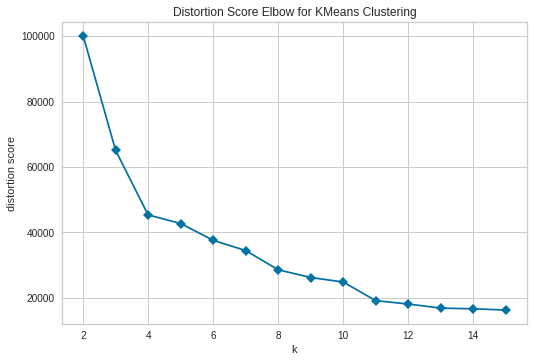

In [6]:
elbow_visualizer = KElbowVisualizer(KMeans(), k=(2,16), timings=False)
elbow_visualizer.fit(X)
elbow_visualizer.size = (600, 400)
elbow_visualizer.poof()

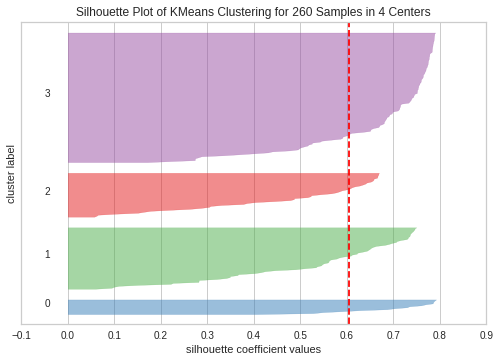

In [7]:
model = KMeans(4)
silhouette_visualizer = SilhouetteVisualizer(model)

silhouette_visualizer.fit(X)
silhouette_visualizer.size = (600, 400)
silhouette_visualizer.poof()